In [20]:
#CF_ST_LF_RFLW_RW

In [21]:
#import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [22]:
data=pd.read_csv('G:/CF_ST_LF_RFLW_RW.csv')
data

,Special skill1,Defensive mistake,dribble won,Minutes played,Battle won1,Defensive performance,Tackles won1,correct pass,battles won1,Shot to goal rate,...,shoot,key pass,assist,goals,age,popularity,National game,club,Price1,Price2
0,1,0.0,0.0,1.4,11.7,1.4,0.5,74.1,5.5,0.16,...,2.7,0.9,0,2,28,2,0,est,300,400
1,2,0.0,0.5,2.5,7.0,3.1,0.5,71.2,6.3,0.22,...,2.3,1.6,0,4,28,5,0,est,400,750
2,3,0.0,0.0,1.7,4.7,3.1,0.4,74.4,1.2,0.16,...,2.3,1.9,2,0,35,2,0,est,350,250
3,2,0.0,0.9,0.7,5.3,0.9,0.0,25.0,2.6,0.00,...,1.8,0.0,0,0,22,0,0,est,150,125
4,2,0.1,0.7,8.6,5.0,2.4,1.1,73.3,1.4,0.31,...,1.7,1.2,4,14,25,2,2,est,350,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,0.0,0.0,3.4,9.2,1.7,1.0,60.6,5.0,0.00,...,2.1,0.8,0,0,30,1,0,havadar,125,125
68,2,0.0,0.3,2.3,11.6,1.7,0.9,70.4,5.8,0.80,...,3.5,0.9,0,2,36,1,0,havadar,150,100
69,3,0.4,0.4,1.5,9.2,0.9,2.2,78.7,3.5,0.14,...,3.1,0.4,0,2,21,0,0,havadar,75,125
70,1,0.0,0.0,0.1,0.0,0.0,0.0,90.0,0.0,0.00,...,0.0,0.0,0,0,22,0,0,havadar,75,100


In [23]:
data1=data.dropna(how="any")

data1.reset_index(drop=True,inplace=True)

In [24]:
data1

,Special skill1,Defensive mistake,dribble won,Minutes played,Battle won1,Defensive performance,Tackles won1,correct pass,battles won1,Shot to goal rate,...,shoot,key pass,assist,goals,age,popularity,National game,club,Price1,Price2
0,1,0.0,0.0,1.4,11.7,1.4,0.5,74.1,5.5,0.16,...,2.7,0.9,0,2,28,2,0,est,300,400
1,2,0.0,0.5,2.5,7.0,3.1,0.5,71.2,6.3,0.22,...,2.3,1.6,0,4,28,5,0,est,400,750
2,3,0.0,0.0,1.7,4.7,3.1,0.4,74.4,1.2,0.16,...,2.3,1.9,2,0,35,2,0,est,350,250
3,2,0.0,0.9,0.7,5.3,0.9,0.0,25.0,2.6,0.00,...,1.8,0.0,0,0,22,0,0,est,150,125
4,2,0.1,0.7,8.6,5.0,2.4,1.1,73.3,1.4,0.31,...,1.7,1.2,4,14,25,2,2,est,350,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,0.0,0.0,3.4,9.2,1.7,1.0,60.6,5.0,0.00,...,2.1,0.8,0,0,30,1,0,havadar,125,125
67,2,0.0,0.3,2.3,11.6,1.7,0.9,70.4,5.8,0.80,...,3.5,0.9,0,2,36,1,0,havadar,150,100
68,3,0.4,0.4,1.5,9.2,0.9,2.2,78.7,3.5,0.14,...,3.1,0.4,0,2,21,0,0,havadar,75,125
69,1,0.0,0.0,0.1,0.0,0.0,0.0,90.0,0.0,0.00,...,0.0,0.0,0,0,22,0,0,havadar,75,100


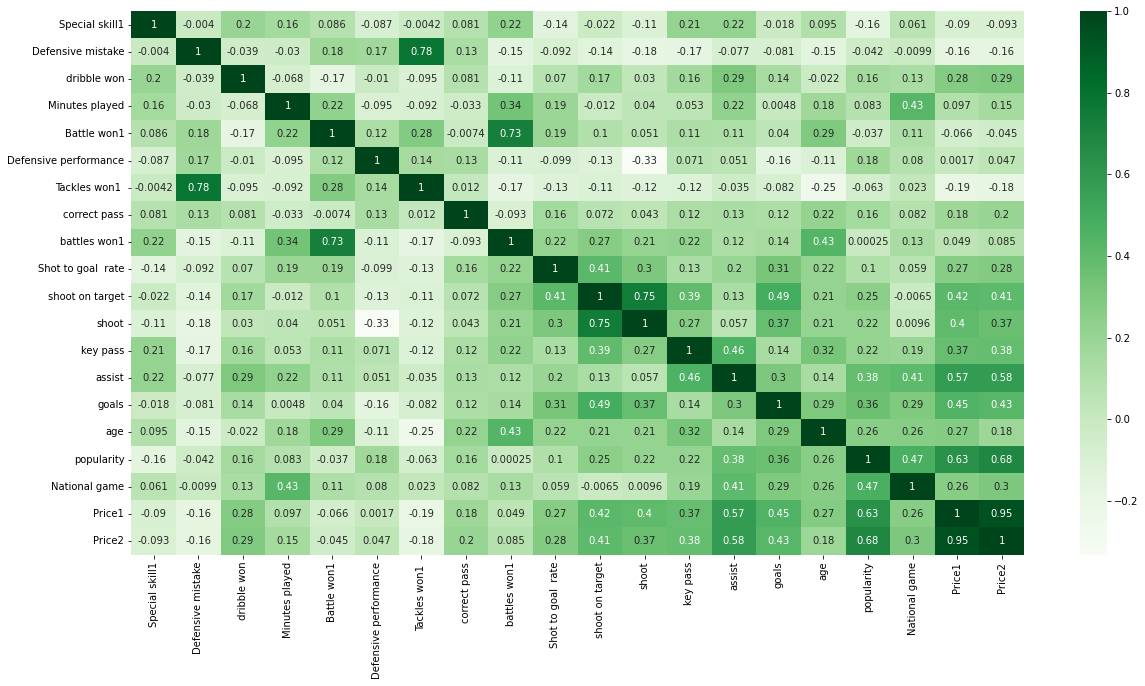

In [25]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(data1)

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

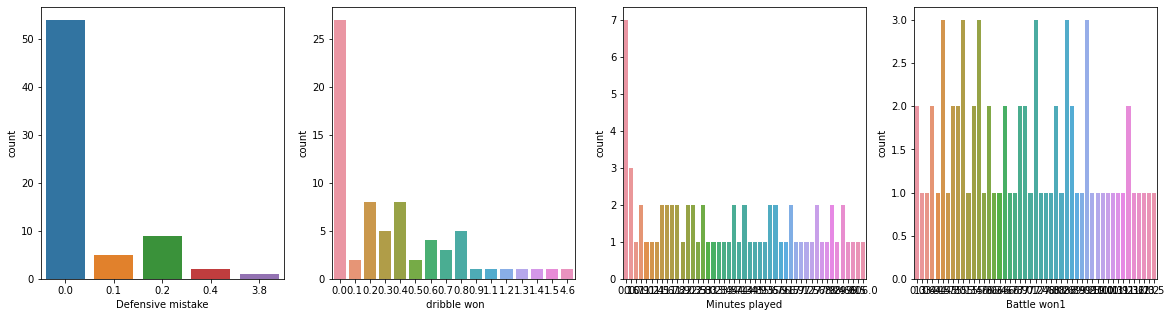

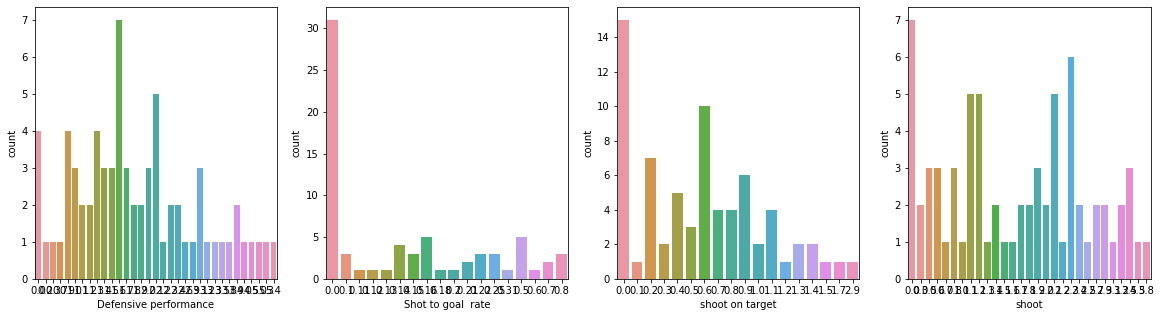

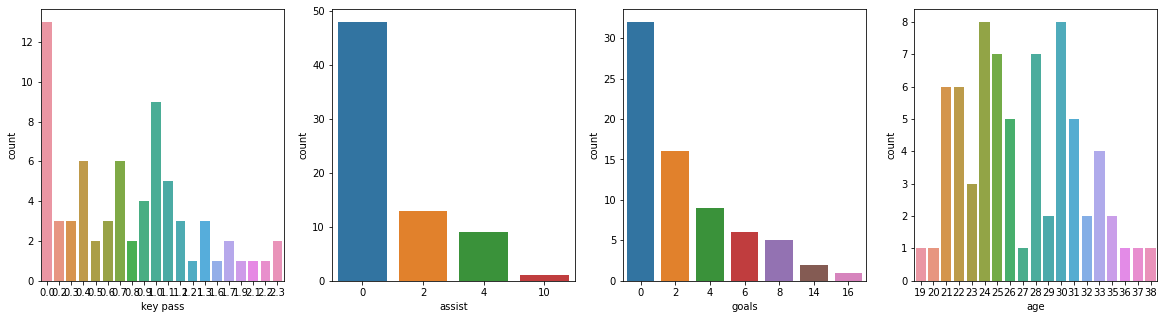

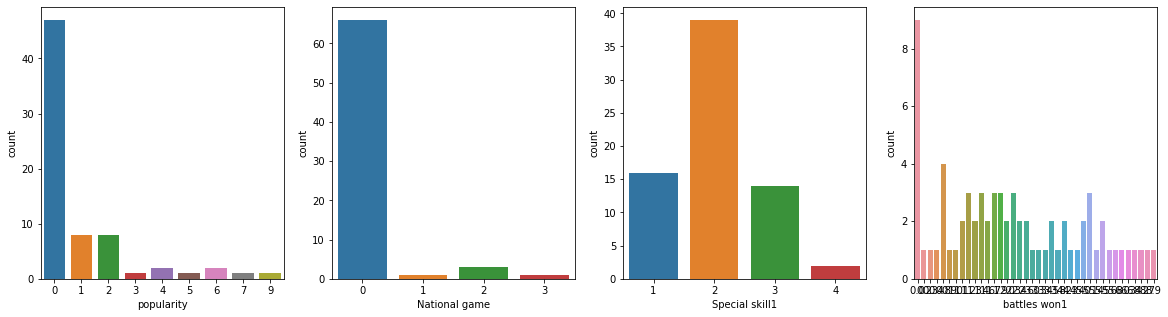

In [26]:
categorical=categorical=[ 'Defensive mistake',' dribble won','Minutes played','Battle won1','Defensive performance','Shot to goal  rate','shoot on target','shoot','key pass','assist','goals','age','popularity','National game' ,'Special skill1','battles won1']
i=0
while i<16:
    fig=plt.figure(figsize=[20,5])
    plt.subplot(1,4,1)
    sns.countplot(x=categorical[i],data=data1)
    i+=1
    
    plt.subplot(1,4,2)
    sns.countplot(x=categorical[i],data=data1)
    i+=1
    plt.subplot(1,4,3)
    sns.countplot(x=categorical[i],data=data1)
    i+=1
    plt.subplot(1,4,4)
    sns.countplot(x=categorical[i],data=data1)
    i+=1
    
    plt.show

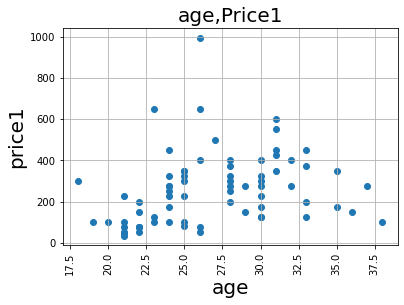

In [27]:
plt.scatter(data['age'],data['Price1'])
plt.title('age,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('age',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

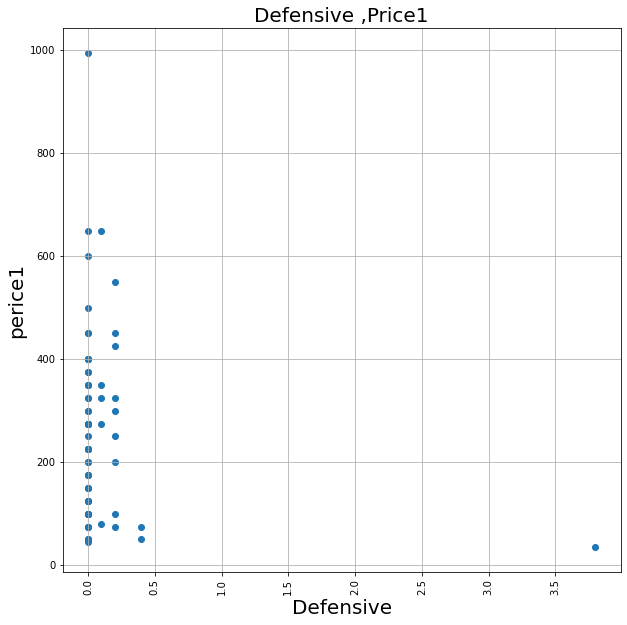

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(data['Defensive mistake'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

In [29]:
#نویز

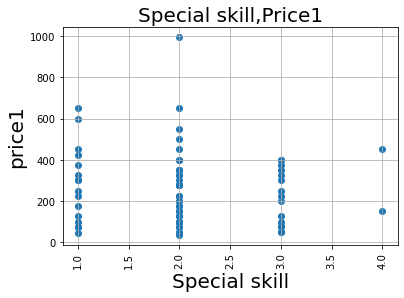

In [30]:
plt.scatter(data['Special skill1'],data['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

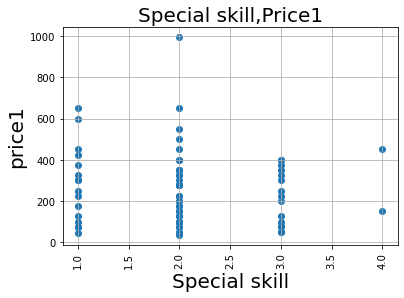

In [31]:




plt.scatter(data['Special skill1'],data['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

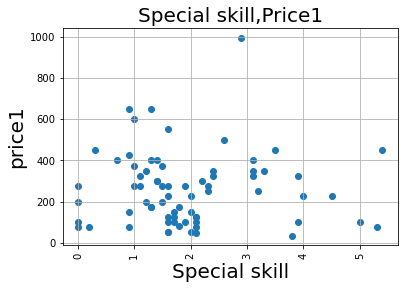

In [32]:

plt.scatter(df['Defensive performance'],df['Price1'])
plt.title('Special skill,Price1',fontsize=20)
plt.ylabel('price1',fontsize=20)
plt.xlabel('Special skill',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show()

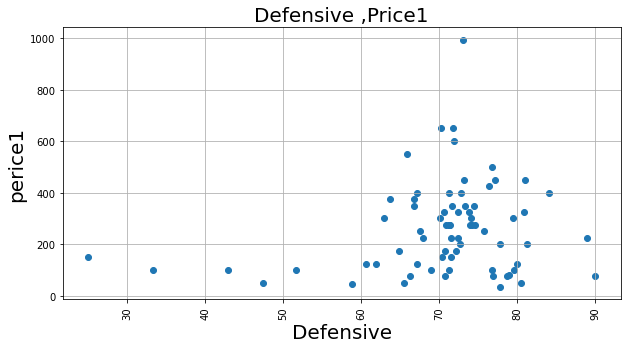

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(data['correct pass'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

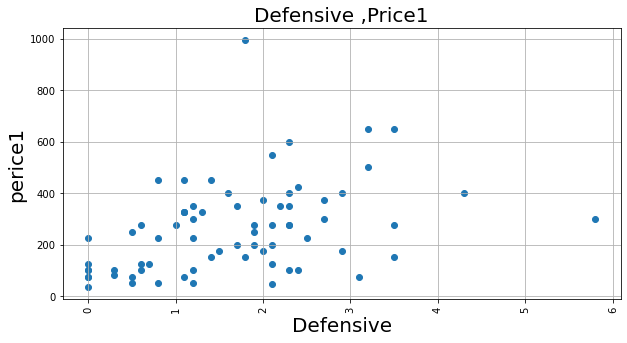

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(data1['shoot'],data1['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

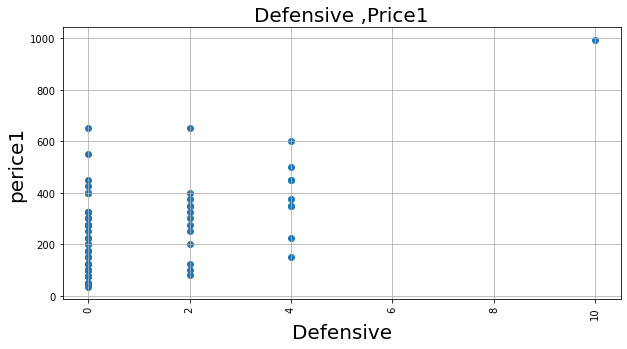

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(data['assist'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

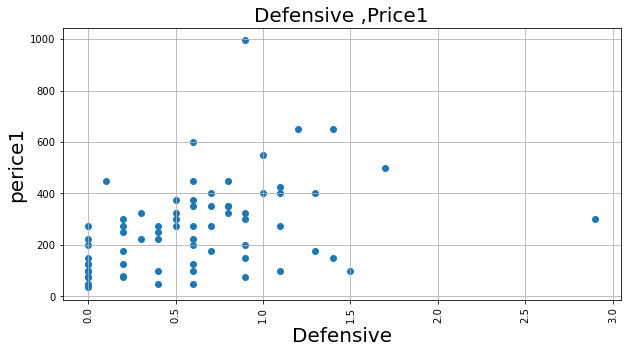

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(data['shoot on target'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

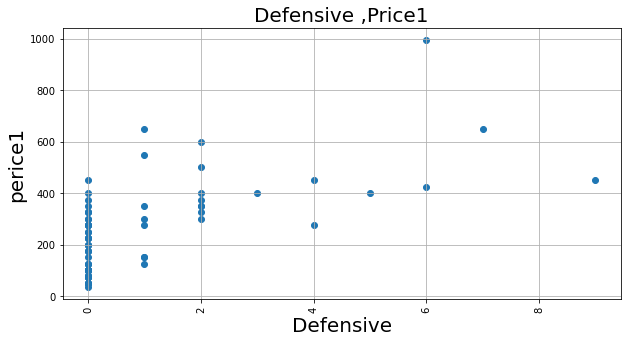

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(data['popularity'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

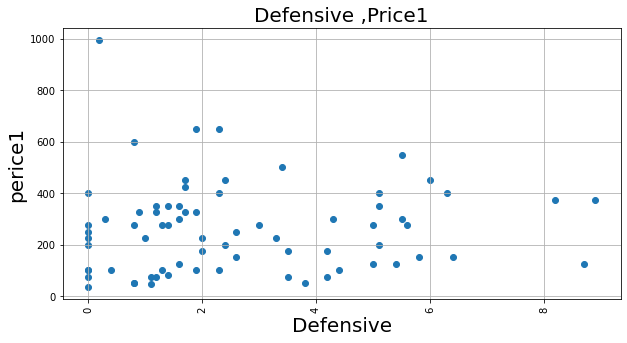

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(data['battles won1'],data['Price1'])
plt.title('Defensive ,Price1',fontsize=20)
plt.ylabel('perice1',fontsize=20)
plt.xlabel('Defensive',fontsize=20)
plt.grid()
plt.xticks (rotation=90)


plt.show() 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
Special skill1           0
Defensive mistake        0
 dribble won             0
Minutes played           0
Battle won               0
Defensive performance    0
Tackles won              0
correct pass             0
battles won1             0
Shot to goal  rate       0
shoot on target          0
shoot                    0
key pass                 0
assist                   0
goals                    0
age                      0
popularity               0
National game            0
club                     0
Price1                   0
Price2                   0
dtype: int

SyntaxError: invalid syntax (894173076.py, line 1)

In [41]:
X= pd.DataFrame(data1, columns = ['Special skill1','Minutes played','Battle won1','Defensive performance','Shot to goal  rate','shoot on target','shoot','key pass','correct pass','assist','goals','age','popularity','National game' ,'battles won1']
)
y=data1['Price2'].values.reshape(-1,1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.35 ,random_state=0)
model = LinearRegression ()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute eror: 133.95515627043991
Mean Squared Error: 26721.831366821214
Root Mean Squared Error: 163.46813563144718
R2 Score: 0.02914433342460343


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
model_new=LinearRegression ()
kfold_validation=KFold(20)
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[ 5.26060249e-01 -5.33986555e+01 -3.79820729e-01 -7.19668346e-01
  8.31846849e-01 -1.07146838e+00 -9.14919976e+00 -2.19152616e-01
 -1.18697546e+01  8.52007436e-01 -1.10961082e+00  5.87393973e-01
 -1.25427137e-01  1.41398108e-01 -2.18277129e-01 -4.71090102e-01
 -9.77707551e+00 -2.20833510e-01 -2.68994223e+02 -7.30095786e+01]
-21.38975644532887


In [44]:
dfa=data1[data1.index<28]
dfa1=data1[data1.index>32]
dfa2=dfa.append(dfa1)
dfa2.reset_index(drop=True,inplace=True)
X= pd.DataFrame(dfa2, columns = ['Minutes played','Battle won1','Shot to goal  rate','Defensive performance','shoot on target','shoot','key pass','correct pass','assist','goals','age','popularity','National game' ,'battles won1']
)
y=dfa2['Price1'].values.reshape(-1,1)
X_train1,X_test1,y_train1,y_test1 =train_test_split(X,y,test_size=0.2
                                                    ,random_state=0)
modelnew = LinearRegression ()
modelnew.fit(X_train1,y_train1)
y_pred1=modelnew.predict(X_test1)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test1,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test1,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test1,y_pred1))
#44-48
#4-8
#28-32

Mean Absolute eror: 68.78429890176649
Mean Squared Error: 6506.30628544913
Root Mean Squared Error: 80.66167792359101
R2 Score: 0.7322788755803689


In [45]:
X

,Minutes played,Battle won1,Shot to goal rate,Defensive performance,shoot on target,shoot,key pass,correct pass,assist,goals,age,popularity,National game,battles won1
0,1.4,11.7,0.16,1.4,0.9,2.7,0.9,74.1,0,2,28,2,0,5.5
1,2.5,7.0,0.22,3.1,1.3,2.3,1.6,71.2,0,4,28,5,0,6.3
2,1.7,4.7,0.16,3.1,0.8,2.3,1.9,74.4,2,0,35,2,0,1.2
3,0.7,5.3,0.00,0.9,0.0,1.8,0.0,25.0,0,0,22,0,0,2.6
4,8.6,5.0,0.31,2.4,0.7,1.7,1.2,73.3,4,14,25,2,2,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3.4,9.2,0.00,1.7,0.6,2.1,0.8,60.6,0,0,30,1,0,5.0
62,2.3,11.6,0.80,1.7,1.4,3.5,0.9,70.4,0,2,36,1,0,5.8
63,1.5,9.2,0.14,0.9,0.9,3.1,0.4,78.7,0,2,21,0,0,3.5
64,0.1,0.0,0.00,0.0,0.0,0.0,0.0,90.0,0,0,22,0,0,0.0


In [51]:

Minutesplayed=float(input("Minutes played for CF_ST_LF_RFLW_RWplayeris a"))

Defensiveperformance=float(input("Defensive performance for CF_ST_LF_RFLW_RWplayer is "))

battleswon1=float(input("battles won1 for CF_ST_LF_RFLW_RWplayer is "))
correctpass=float(input(" correctpass for CF_ST_LF_RFLW_RWplayer is "))
shootontarget=float(input("shoot on target for CF_ST_LF_RFLW_RWplayer is "))
Shottogoalrate=float(input("Shot to goal  rate for CF_ST_LF_RFLW_RWplayer is "))
keypass=float(input("keypass for CF_ST_LF_RFLW_RWplayer is "))
assist=float(input("assist for CF_ST_LF_RFLW_RWplayer is")) 
goals=float(input("goals  for CF_ST_LF_RFLW_RWplayer is"))
shoot=float(input("shoot  for CF_ST_LF_RFLW_RWplayer is"))
age=float(input("age  for CF_ST_LF_RFLW_RWplayer is"))
popularity =float(input("popularity   for CF_ST_LF_RFLW_RWplayer is")) 
Nationalgame=float(input("National game  for CF_ST_LF_RFLW_RWplayer is"))
Battlewon1=float(input("Battlewon1  for CF_ST_LF_RFLW_RWplayer  is"))
p2=modelnew.predict([[Minutesplayed,Battlewon1,Shottogoalrate,Defensiveperformance,shootontarget,shoot,keypass,correctpass,assist,goals,age,popularity,Nationalgame,battleswon1]])
p2

Minutes played for CF_ST_LF_RFLW_RWplayeris a1.4
Battle won for CF_ST_LF_RFLW_RWplayer is 11.7
Defensive performance for CF_ST_LF_RFLW_RWplayer is 1.4
battles won1 for CF_ST_LF_RFLW_RWplayer is 5.5
 correctpass for CF_ST_LF_RFLW_RWplayer is 74.1
shoot on target for CF_ST_LF_RFLW_RWplayer is 0.9
Shot to goal  rate for CF_ST_LF_RFLW_RWplayer is 0.16
keypass for CF_ST_LF_RFLW_RWplayer is 0.9
assist for CF_ST_LF_RFLW_RWplayer is0
goals  for CF_ST_LF_RFLW_RWplayer is2
shoot  for CF_ST_LF_RFLW_RWplayer is2.7
age  for CF_ST_LF_RFLW_RWplayer is28
popularity   for CF_ST_LF_RFLW_RWplayer is2
National game  for CF_ST_LF_RFLW_RWplayer is0
Battlewon1  for CF_ST_LF_RFLW_RWplayer  is5


array([[267.91496466]])

In [49]:
X

,Minutes played,Battle won1,Shot to goal rate,Defensive performance,shoot on target,shoot,key pass,correct pass,assist,goals,age,popularity,National game,battles won1
0,1.4,11.7,0.16,1.4,0.9,2.7,0.9,74.1,0,2,28,2,0,5.5
1,2.5,7.0,0.22,3.1,1.3,2.3,1.6,71.2,0,4,28,5,0,6.3
2,1.7,4.7,0.16,3.1,0.8,2.3,1.9,74.4,2,0,35,2,0,1.2
3,0.7,5.3,0.00,0.9,0.0,1.8,0.0,25.0,0,0,22,0,0,2.6
4,8.6,5.0,0.31,2.4,0.7,1.7,1.2,73.3,4,14,25,2,2,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3.4,9.2,0.00,1.7,0.6,2.1,0.8,60.6,0,0,30,1,0,5.0
62,2.3,11.6,0.80,1.7,1.4,3.5,0.9,70.4,0,2,36,1,0,5.8
63,1.5,9.2,0.14,0.9,0.9,3.1,0.4,78.7,0,2,21,0,0,3.5
64,0.1,0.0,0.00,0.0,0.0,0.0,0.0,90.0,0,0,22,0,0,0.0
